In [1]:
%matplotlib inline
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

from matplotlib import rc
rc('animation', html='jshtml')
from mpl_toolkits import mplot3d # 3d plotting
from matplotlib import animation  # animate 3D plots
#from mpl_toolkits.mplot3d import Axes3D  # 3D plots

import random
import pandas as pd
import numpy as np
import codecs
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
# si es que todo falla
! gdown --id 1wNUjEDCKQkK0sxsMs8pUOaH2ElrYldfQ # dataframe ya procesado
! gdown --id 1mRhkA5Br6OPW9-vU2o785GdA70yNDrUP # dataframe sin discretizar para sacar marcas
food_df_final = pd.read_csv("final_food.csv")
pd_fn_copy = pd.read_csv("pd_fn_copy.csv")
food_df_final

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1wNUjEDCKQkK0sxsMs8pUOaH2ElrYldfQ
To: /content/final_food.csv
100% 6.83M/6.83M [00:00<00:00, 116MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1mRhkA5Br6OPW9-vU2o785GdA70yNDrUP
To: /content/pd_fn_copy.csv
100% 1.26M/1.26M [00:00<00:00, 84.7MB/s]


,Unnamed: 0,Unnamed: 0.1,index_x,product_name,nova_group,nutriscore_grade,food_groups_en,energy-kcal_100g,countries_en,index_y,...,15,16,17,18,19,20,21,22,23,24
0,0,0,19,"['m', '&', 'm', ""'s"", 'peanut', 'butter']",4.0,4,0.074929,0.958757,0.274174,0,...,-0.350266,0.035250,-0.353528,-0.514182,0.773588,-0.372672,-0.173808,-0.002262,0.314486,0.245633
1,1,1,32,"['bakers', 'best', ',', 'white', 'bread']",4.0,1,0.023074,0.542245,0.839903,1,...,-0.433490,0.494554,-0.508975,-0.048811,0.588508,-0.215240,0.472064,-0.477712,0.129884,0.228293
2,2,2,34,"['ritter', 'sport', ',', 'knusperflakes', 'mit...",4.0,4,0.069997,0.821294,0.566195,2,...,-0.118554,0.316538,0.072080,-0.672998,0.007300,-0.287459,0.195410,-0.525274,-0.132562,0.446382
3,3,3,42,"['dextrose', '&', 'maltodextrine', 'mixed', 'b...",4.0,3,0.101517,0.922882,0.371460,3,...,-0.181915,0.500792,-0.302847,0.560170,0.680292,-0.322062,-0.029376,-0.302648,0.198695,-0.093912
4,4,4,43,"['solid', 'dark', 'chocolate']",4.0,4,0.068624,0.820366,0.567706,4,...,-0.075773,0.634260,-0.195730,0.228343,0.431533,-1.081693,0.421113,0.159365,0.546123,0.194997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,14738,14738,76719,"['pure', 'euphoria', 'longana', 'honey']",2.0,3,0.093997,0.694297,0.713524,14738,...,0.252117,0.355266,0.456340,0.130024,0.376882,-0.447027,0.252302,-0.097800,0.335025,0.395397
14739,14739,14739,76740,"['champignons', 'noirs']",1.0,0,0.153626,0.945035,0.288631,14739,...,0.921410,0.030980,-1.284690,-1.003645,2.050350,0.414350,0.322675,-0.378380,-1.260800,0.089190
14740,14740,14740,76741,"['pâte', 'de', 'curry', 'vert', 'thaï']",3.0,2,0.501356,0.724181,0.473503,14740,...,0.443982,0.152438,-0.185860,-0.891228,1.242048,-0.319330,0.141400,0.203432,-0.387859,0.993974
14741,14741,14741,76750,"['dutch', 'lady', 'purefarm', 'full', 'cream',...",4.0,1,0.106339,0.183938,0.977169,14741,...,-0.167775,0.847791,-0.521742,0.109326,0.509638,-0.694020,0.316839,-0.152803,0.068330,0.464604


In [3]:
# Creamos el nuevo dataframe 'X' que solo tendra los valores numericos
X1 = food_df_final.iloc[:,4:8] # aumentar a medida que volvemos a cargar el .csv
X2 = food_df_final.iloc[:,8:]

X = pd.merge( X1.reset_index(), X2.reset_index(), left_index=True, right_index=True)
X = X.drop(['index_x', 'index_y'], axis=1)
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_y'} in the result is deprecated and will raise a MergeError in a future version.
  """


,nova_group,nutriscore_grade,food_groups_en,energy-kcal_100g,countries_en,0,1,2,3,4,...,15,16,17,18,19,20,21,22,23,24
0,4.0,4,0.074929,0.958757,0.274174,-0.087735,-0.025963,-0.244681,0.174950,-0.419265,...,-0.350266,0.035250,-0.353528,-0.514182,0.773588,-0.372672,-0.173808,-0.002262,0.314486,0.245633
1,4.0,1,0.023074,0.542245,0.839903,-0.239920,-0.149153,0.150604,-0.048654,-0.055748,...,-0.433490,0.494554,-0.508975,-0.048811,0.588508,-0.215240,0.472064,-0.477712,0.129884,0.228293
2,4.0,4,0.069997,0.821294,0.566195,0.189070,-0.446080,-0.201312,-0.431220,-0.150270,...,-0.118554,0.316538,0.072080,-0.672998,0.007300,-0.287459,0.195410,-0.525274,-0.132562,0.446382
3,4.0,3,0.101517,0.922882,0.371460,-0.446223,0.028777,0.014580,0.223593,-0.108662,...,-0.181915,0.500792,-0.302847,0.560170,0.680292,-0.322062,-0.029376,-0.302648,0.198695,-0.093912
4,4.0,4,0.068624,0.820366,0.567706,-0.643080,-0.679067,0.341500,0.331467,0.345613,...,-0.075773,0.634260,-0.195730,0.228343,0.431533,-1.081693,0.421113,0.159365,0.546123,0.194997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,2.0,3,0.093997,0.694297,0.713524,-0.974700,-0.156400,-0.231503,0.600250,-0.240487,...,0.252117,0.355266,0.456340,0.130024,0.376882,-0.447027,0.252302,-0.097800,0.335025,0.395397
14739,1.0,0,0.153626,0.945035,0.288631,0.434527,-0.649195,-1.278170,0.351349,-0.686160,...,0.921410,0.030980,-1.284690,-1.003645,2.050350,0.414350,0.322675,-0.378380,-1.260800,0.089190
14740,3.0,2,0.501356,0.724181,0.473503,-0.552748,-0.337820,-0.326352,0.516222,0.018378,...,0.443982,0.152438,-0.185860,-0.891228,1.242048,-0.319330,0.141400,0.203432,-0.387859,0.993974
14741,4.0,1,0.106339,0.183938,0.977169,-0.409517,0.054518,0.227292,0.283005,0.089799,...,-0.167775,0.847791,-0.521742,0.109326,0.509638,-0.694020,0.316839,-0.152803,0.068330,0.464604


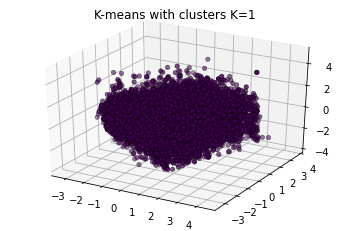

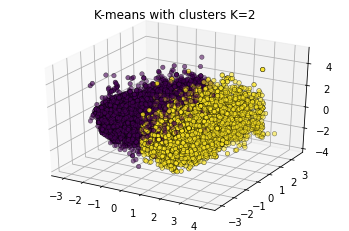

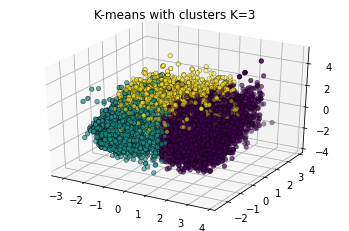

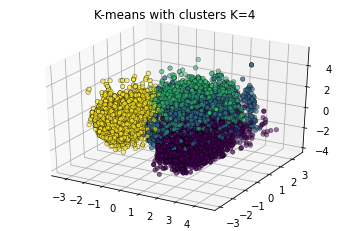

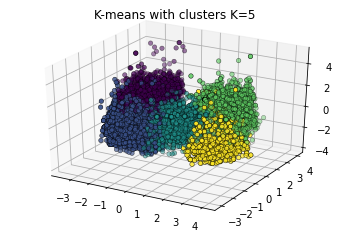

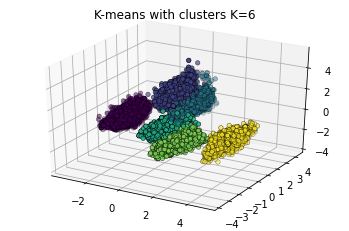

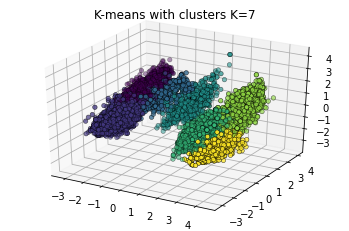

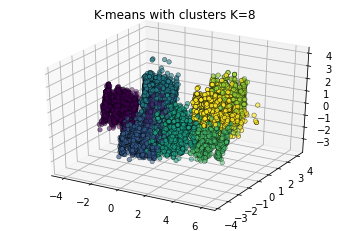

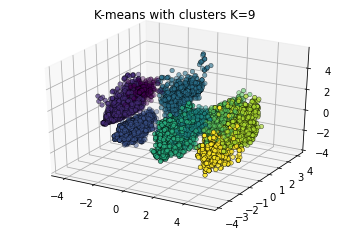

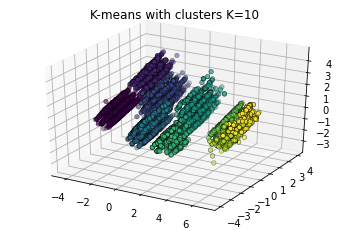

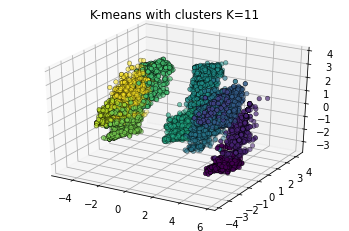

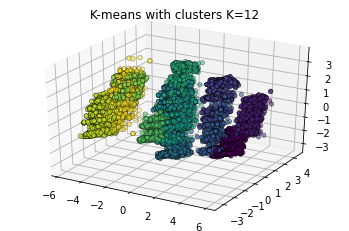

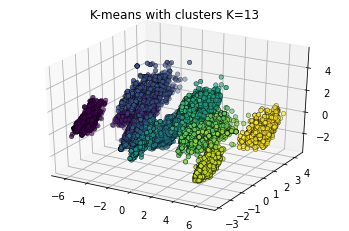

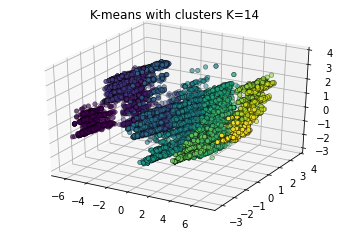

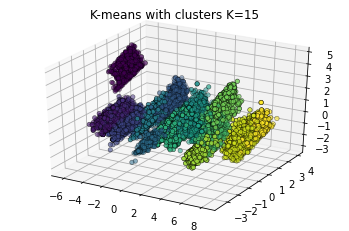

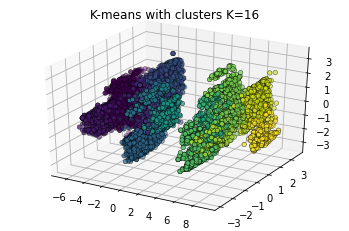

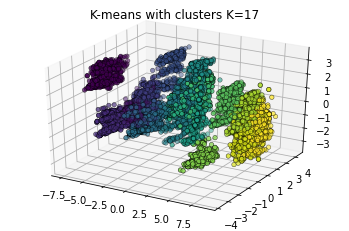

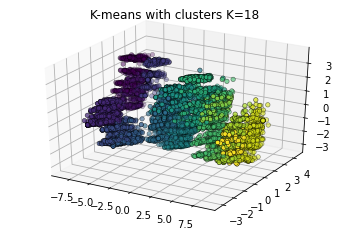

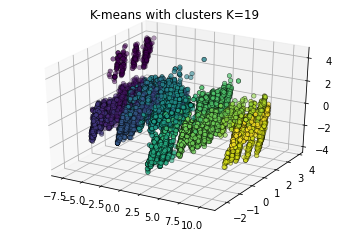

In [4]:
inertias = []
errors = {}
K = range(1, 20)
  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    kmeans.fit(X)

    inertias.append(kmeans.inertia_)
    errors[k] = kmeans.inertia_

    # 3D
    X['clusters'] = kmeans.fit_predict(X)
    pca_num_components = 3
    reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
    results = pd.DataFrame(reduced_data, columns=['pca1','pca2','pca3'])

    ax = plt.axes(projection='3d')
    ax.scatter3D(results['pca1'], results['pca2'], results['pca3'], c=X['clusters'], edgecolors='black', linewidth=0.5);
    plt.title('K-means with clusters K=%i' %k)
    plt.show()

1 : 146680.38268894234
2 : 118038.19375009804
3 : 104282.09903880373
4 : 97202.3787626742
5 : 91480.00415797473
6 : 86923.68436847605
7 : 84043.68250420313
8 : 79963.27689377051
9 : 77678.86374668528
10 : 75692.86391564536
11 : 73996.85693012152
12 : 72690.4837485576
13 : 71494.87777858517
14 : 70526.15727810262
15 : 69840.47154165502
16 : 68692.92601123128
17 : 67938.01154669959
18 : 67193.22183377751
19 : 66959.9017759936


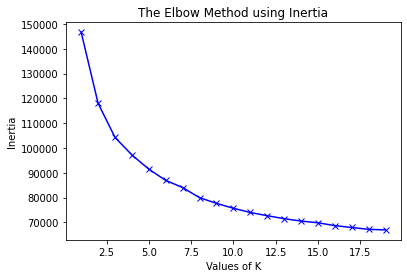

In [5]:
for key, val in errors.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [6]:
# K=4 es el mejor
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
X['clusters'] = kmeans.fit_predict(X)
X["nutriscore_grade"] = X["nutriscore_grade"].astype(float)
X

,nova_group,nutriscore_grade,food_groups_en,energy-kcal_100g,countries_en,0,1,2,3,4,...,16,17,18,19,20,21,22,23,24,clusters
0,4.0,4.0,0.074929,0.958757,0.274174,-0.087735,-0.025963,-0.244681,0.174950,-0.419265,...,0.035250,-0.353528,-0.514182,0.773588,-0.372672,-0.173808,-0.002262,0.314486,0.245633,1
1,4.0,1.0,0.023074,0.542245,0.839903,-0.239920,-0.149153,0.150604,-0.048654,-0.055748,...,0.494554,-0.508975,-0.048811,0.588508,-0.215240,0.472064,-0.477712,0.129884,0.228293,1
2,4.0,4.0,0.069997,0.821294,0.566195,0.189070,-0.446080,-0.201312,-0.431220,-0.150270,...,0.316538,0.072080,-0.672998,0.007300,-0.287459,0.195410,-0.525274,-0.132562,0.446382,1
3,4.0,3.0,0.101517,0.922882,0.371460,-0.446223,0.028777,0.014580,0.223593,-0.108662,...,0.500792,-0.302847,0.560170,0.680292,-0.322062,-0.029376,-0.302648,0.198695,-0.093912,1
4,4.0,4.0,0.068624,0.820366,0.567706,-0.643080,-0.679067,0.341500,0.331467,0.345613,...,0.634260,-0.195730,0.228343,0.431533,-1.081693,0.421113,0.159365,0.546123,0.194997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,2.0,3.0,0.093997,0.694297,0.713524,-0.974700,-0.156400,-0.231503,0.600250,-0.240487,...,0.355266,0.456340,0.130024,0.376882,-0.447027,0.252302,-0.097800,0.335025,0.395397,1
14739,1.0,0.0,0.153626,0.945035,0.288631,0.434527,-0.649195,-1.278170,0.351349,-0.686160,...,0.030980,-1.284690,-1.003645,2.050350,0.414350,0.322675,-0.378380,-1.260800,0.089190,3
14740,3.0,2.0,0.501356,0.724181,0.473503,-0.552748,-0.337820,-0.326352,0.516222,0.018378,...,0.152438,-0.185860,-0.891228,1.242048,-0.319330,0.141400,0.203432,-0.387859,0.993974,2
14741,4.0,1.0,0.106339,0.183938,0.977169,-0.409517,0.054518,0.227292,0.283005,0.089799,...,0.847791,-0.521742,0.109326,0.509638,-0.694020,0.316839,-0.152803,0.068330,0.464604,1


In [7]:
df_sin_discretizar_copia = pd_fn_copy
n = X[['nova_group','nutriscore_grade']].values
n

# Reducimos dimensiones con PCA
pca_num_components = 3

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data, columns=['pca1','pca2','pca3'])

# 3D

import plotly.express as px
fig = px.scatter_3d(X, x=results['pca1'], y=results['pca2'], z=results['pca3'], color='clusters', hover_name=df_sin_discretizar_copia['food_groups_en'], symbol='nutriscore_grade', size='nova_group')
fig.update_traces(marker=dict(line=dict(width=0.1, color='Black')), selector=dict(mode='markers'))
fig.update_layout(autosize=False, width=1200, height=1000, margin=dict(l=50,r=50,b=100,t=100,pad=4),paper_bgcolor="LightSteelBlue",)
fig.show()


# Redes Neuronales

In [8]:
# usar KERAS
# usar los metodos de dropout

In [9]:
pca_num_components = 3
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data, columns=['pca1','pca2','pca3'])

In [10]:
# 50% training, 20% validate, 30% test
indexes = [i for i in range(len(X))]
np.random.shuffle(indexes)

train_index = indexes[0:7371] # 50%
validation_index = indexes[7371:8845] # 20%
test_index = indexes[8845:] # 30 %

inputs = np.array(results[['pca1','pca2']])
targets = np.array(results['pca3'])
x_train = inputs[train_index]
y_train = targets[train_index]
x_validation = inputs[validation_index]
y_validation = targets[validation_index]
x_test = inputs[test_index]
y_test = targets[test_index]


In [11]:
# neural network classifier